# NLP With Hotel Review Part 1

Authour: Tanisha Batra <br>
Contact: jsm.batra@outlook.com <br>
Date: June 6th, 2022 <br>
Brainstation Assignment <br>

This report will begin with some Exploratory Data Analysis (EDA), and then move into data augmentation, modelling, and iteration over model improvements.

## Exploratory Data Analysis

First, I will take a look at the data set. It is important to keep in mind that the target column of interest is Reviewer_Score.

In [297]:
#importing relevant libraries to help work with the data imported soon!
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [298]:
odf = pd.read_csv('data/Hotel_Reviews.csv')
odf.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Upon initial observation, there seems to be both test-based data (like reviewer nationality and hotel name) and numerical data (like reviewer score). A single row of data seems to represent information related to a single hotel. Each hotel has its respective longitude and latitude and reviewer score. This review score, being a decimal, upon initial instrinct seems to be an average out of all the customers of the hotel. However, I do see another column called average score. Perhaps the reviewer score refers to the score given by a single customer, for the corresponding tags. Another observation is they've taken a representative positive and negative review for each hotel. It is unclear however, how this representative review was chosen.

### What is the shape of the dataset?

In [299]:
print(f"The dataset has {odf.shape[0]} rows and {odf.shape[1]} columns")

The dataset has 515738 rows and 17 columns


There are a great deal of rows in this dataset! 17 columns shows there's a lot of metadata for each hotel and the reviewer score we can look at.

### The reviews provided are all given as decimal values. Convert them into integers from 1 to 10

In [300]:
odf['Reviewer_Score'].dtype

dtype('float64')

As can be seen above, the data type is not an integer. Since the reviewer score are decimals, I am assuming that the dataset took the average of all of these reviews. Hence, to convert to an integer, it makes sense to round the score to get an accurate reviewer score. Then after it is a float, I will convert the datatype to an integer.

In [301]:
odf['Reviewer_Score'] = odf['Reviewer_Score'].round(0) #Don't forget to convert to integer!
odf['Reviewer_Score'] = odf['Reviewer_Score'].astype('int64')

I chose int64 to be safe. What if the reviews start being calculated out of 100 or 1000 in the future? Or with very many decimals. This may be a stretch - but better safe then sorry! Now to check if the column's datatype has really changed.

In [302]:
odf['Reviewer_Score'].dtype

dtype('int64')

The reviews are now integers. Now I will see that the values range from 1-10.

In [303]:
for i in odf['Reviewer_Score'].unique():
    print(i)

3
8
7
4
5
10
6
9
2


There are only integers from 1-10 in this column now.

### The reviews are scored from 1 to 10. What do you expect the distribution of scores to look like? What is the actual distribution of reviews?

I don't have too many initial expectations about the distributions scores. Perhaps the hotels are doing well, and many of the scores are more than 5. 

In [304]:
Grouped = odf.groupby(by="Reviewer_Score").size()
Grouped
#Help with seeing distribution:https://thinkingneuron.com/how-to-visualize-data-distribution-of-a-categorical-variable-in-python/#:~:text=How%20to%20visualize%20data%20distribution%20of%20a%20categorical%20variable%20in%20Python,-Machine%20Learning%2C%20Python&text=Bar%20charts%20can%20be%20used,the%20frequency%20of%20each%20value.

Reviewer_Score
2       2199
3       4406
4       9436
5      24188
6      27800
7      44088
8     110155
9     105722
10    187744
dtype: int64

[Text(0.5, 0, 'Reviewer Score'),
 Text(0, 0.5, 'Number of Hotels'),
 Text(0.5, 1.0, 'Distribution of Review Scores')]

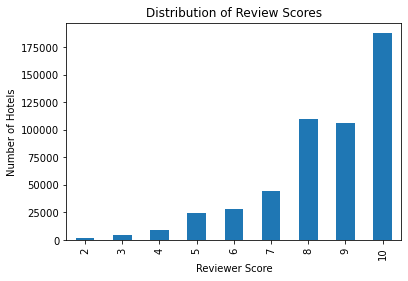

In [305]:
x = Grouped.plot.bar()
x.set(xlabel="Reviewer Score", ylabel="Number of Hotels", title="Distribution of Review Scores")

As expected, many of the reviews are 5 or greater than 5. Interestingly, none of the reviews have a value of 1. Assuming that reviewer score column had average for all of the reviews of a particular hotel, and we rounded that - it appears that no hotel had an average review score of one. Additionally, what's surprising is the disparity and sharpe rise in high reviewer score. Less than approximately 10 000 people gave a score of two, wile nearly 200 000 people gave a score of 10! That's approximately 20 times of an increase! <br> Overall, it's interesting to note the disparity - way more hotels have a higher average score than lower.

### Given this will be a classification problem, what is a potential problem with this distribution?

When we look at our target variable, we can see that this dataset is highly unbalances. There are way more hotels with an average score of 10. The issue is that the classes are not represented equally. So, when we try to predict what score a hotel might have, our model might be biased to report 10. Without even looking at the other features of the hotel, the most common class (higher review scores) could be predicted. <br> This could be indicative to bias in the reviews - for instance, the hotel could have some measures in place so they only display mostly positive reviews. <br> Let's say we were to train a model with this very unbalanced data. The model may not be able to recognize which hotel would have a review with a lower score, especially since lower scores are in the minorty. The model has less examples of these, so it's trickier for the model to learn the metadata around lower scores (e.x. location, date etc), and therefore harder to differentiate from the hotels with a higher review score. <br> To read more, you could check out this website which provided me context for this answer: https://machinelearningmastery.com/what-is-imbalanced-classification/

### This dataset has a good mix of numeric and non-numeric columns. Which columns are numeric? Which are non-numeric? Can you turn some of the non-numeric columns to numeric?

In [306]:
odf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

**The numerical columns are:** Additional_Number_of_Scoring, Average_Score, Review_Total_Negative_Word_Counts, Total_Number_of_Reviews, Review_Total_Positive_Word_Counts, Total_Number_of_Reviews_Reviewer_Has_Given, Reviewer_Score, lat and lng.

9 our of 17 columns are numeric

**The non-numeric columns are:** Hotel_Address, Review_Date, Hotel_Name, Reviewer_Nationality, Negative_Review, Positive_Review, Tags and days_since_review.

8 our of 17 columns are non-numeric

*Can you turn Hotel_Address to Numeric?*

In [307]:
odf['Hotel_Address'].iloc[0:1000:250]

0       s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
250     s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
500    1 15 Templeton Place Earl s Court Kensington a...
750    1 15 Templeton Place Earl s Court Kensington a...
Name: Hotel_Address, dtype: object

Looking at four rows of the dataset, it looks like the address numbers aren't at a particular location. I don't think they would have any significance either. Now that I have a big picture of the numbers in each row, let's take a closer look at one row.

In [308]:
odf['Hotel_Address'].iloc[0]

' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands'

Interestingly, a single row sseems to show the city and country of the hotel. This can later be mapped to a number, or encoded in a sparse matrix solely based on country.

*Can you turn Review Date to Numeric?*

In [309]:
odf['Review_Date'].head()

0     8/3/2017
1     8/3/2017
2    7/31/2017
3    7/31/2017
4    7/24/2017
Name: Review_Date, dtype: object

The values seem to be the month, day then year separated by the / delimiter. It looks prepared and ready to go to become a datetime object! So yes, it can be converted to a more numeric datatype.

*Can you turn Hotel Name column to Numeric?*

In [310]:
odf['Hotel_Name'].value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Ibis Styles Milano Palmanova                           12
Hotel Eitlj rg                                         12
Hotel Wagner                                           10
Mercure Paris Porte d Orleans                          10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

Wow! It seems like there are 1492 different hotels, each with their different frequencies. This can be numeric if we make dummy variables out of it.

*Can you turn Reviewer_Nationality column to numeric?*

In [311]:
odf['Reviewer_Nationality'].value_counts()

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64

Again, there are many nationalities (227). These can also be made into dummy variables to be numeric. If the company finds business value in label encoding in a particular way - for example looking at the inherent ordering of country wealth (GDP etc.) and ordering it this way. For example UK would have a higher ranking then Ireland for instance. However an interest in this has not been indicated, so it may not be useful.

*Can you turn Negative Review and Positive Review column to numeric?*

In [312]:
from random import randint
print(f"Positive Review: \n{odf['Positive_Review'].iloc[randint(0,len(odf['Positive_Review']))]}\n")
print(f"Negative Review: \n{odf['Negative_Review'].iloc[randint(0,len(odf['Negative_Review']))]}")

Positive Review: 
 The location was excellent just as much as the helpful staff The girls at the breakfast buffet we really pretty and the breakfast itself was more than enough to start the day off with I am gonna book again for June sine I come to Vienna veey often 

Negative Review: 
 Nvt


After looking at a random positive and negative review, I can see that they are entirely made of words! Words that have no particular pattern. So we may likely need to do One-Hot Encoding to make dummy variables out of words (the roots of those words and without filler words).

*Can you turn Tags to Numeric?*

In [313]:
odf['Tags'].head()

0    [' Leisure trip ', ' Couple ', ' Duplex Double...
1    [' Leisure trip ', ' Couple ', ' Duplex Double...
2    [' Leisure trip ', ' Family with young childre...
3    [' Leisure trip ', ' Solo traveler ', ' Duplex...
4    [' Leisure trip ', ' Couple ', ' Suite ', ' St...
Name: Tags, dtype: object

Upon initial glance, it seems like the tags column is showing a bunch of supplementary information about a trip booked for a hotel. Now I want to see what the longest tag looks like, and what information it shows.

In [314]:
#help with finding the longest list
#https://stackoverflow.com/questions/69982648/how-to-find-the-longest-list-in-a-pandas-series
max(odf.Tags, key=len)

"[' Leisure trip ', ' Family with older children ', ' Double or Twin Room with Extra Bed 3 Adults with Free Airport Shuttle Service from 5 00am to 00 30am ', ' Stayed 4 nights ', ' Submitted from a mobile device ']"

It's showing the trip purpose, kind of group they're in, they kind of room they requested, length of stay and how the submitted the request. <br> It looks very variable. " Double or Twin Room with Extra Bed 3 Adults with Free Airport Shuttle Service from 5 00am to 00 30am '" is in the same position as "Duplex Double Room ". The latter just talks about a room, while the former is talking about shuttle service and more. <br> Might not be worth making numerical because there's so much discrepancy. Unless the business specifically cares about the predictive value of room type for example to answer their business question, it may not be worth the time to split, hot label encode and do very complex analysis to see if what kind of people enter book the room. Remember, these are the tags for one particular booking for the hotel, for a particular review. We are not even sure which review these tags correspond to - the positive on, negative one, or one that hasn't been included in the dataset.

*Can you turn days_since_review column into numeric?*

In [315]:
odf['days_since_review']

0          0 days
1          0 days
2          3 days
3          3 days
4         10 days
           ...   
515733    704 day
515734    712 day
515735    715 day
515736    717 day
515737    725 day
Name: days_since_review, Length: 515738, dtype: object

This can be turned numeric simply by removing the word "day" or "days" at the end.

# Data Wrangling

### Build the proper dataset separation (Optional but recommended: The dataset is actually too big to run quickly on most laptops. Feel free to sample ~10% of the data as your dataset from this point on. Make sure all classes are included in your subsample.)

In [316]:
#making a copy of the original dataset just in case!
df = odf.copy()

I don't want my sample to have null values in the rows. So it makes sense to drop the null values at this point. First I will check to see if there are any null values, and see which columns they are in.

In [317]:
df.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [318]:
print(3268 / len(df.index))
#idea for taking len of the dataframe index to find number of rows: https://sparkbyexamples.com/pandas/pandas-get-number-of-rows-examples/#:~:text=Get%20Number%20of%20Rows%20in,()%20to%20get%20the%20count.

0.006336550729246245


As can be observed, the rows will null values represent less than 1% of the data, assuming that latitude and longitude map perfectly with each other (a reasonable assumption since they usually come in pairs when plotting coordinates). So we can drop them without fear of losing too much integrity of our data.

In [319]:
df = df.dropna()

In [320]:
df.isna().sum()

Hotel_Address                                 0
Additional_Number_of_Scoring                  0
Review_Date                                   0
Average_Score                                 0
Hotel_Name                                    0
Reviewer_Nationality                          0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Tags                                          0
days_since_review                             0
lat                                           0
lng                                           0
dtype: int64

Now my sample will not have any nulls.

Now I want to make sure that I take a sample that has all the classes, all scores from 2-10. I could simply take a random sample from the data and extract around 10%, and then make sure I have at least one occurence of 2,3,4,5,6,7,8,9 or 10 in them after. 

Instead of that approach, I will try to take care of the problem mentioned earlier - an uneven distribution of the classes, making the dataset imbalanced. Hence, when I take a sample I will also try to get a balanced dataset. <br> I could remove samples with a higher review score, however I would lose more rows and valuable data. Contrastingly, if I oversample I would be duplicating so many rows of data it would take up so much space. So I will try a third approach outlined in this article: https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook#t1

"[...] we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples."

In [321]:
#differentiating independent and dependent variable
X = df.drop(columns='Reviewer_Score')
y = df['Reviewer_Score']

In [322]:
X.shape

(512470, 16)

In [323]:
print(f"Making a note that before sampling, the data has {X.shape[0]} rows.")

Making a note that before sampling, the data has 512470 rows.


The below code for sampling as adopted from previously mentioned article: https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets/notebook#t1 . The article has code with old documentation, that has been updated in this notebook so it can be practically used.

In [324]:
!pip install imblearn
#debugged solution from here: https://stackoverflow.com/questions/47606873/jupyter-no-module-named-imblearn-after-installation

In [325]:
import imblearn

In [326]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X,y)

In [327]:
X_res.shape

(19665, 16)

Right now we undersampled the data. Not randomly, but my removing rows from each cluster appropriately to preserve the maximum about of information.

Making an observation after undersampling:

In [328]:
print(f"Before sampling, there were {X.shape[0]} rows. Now there are {X_res.shape[0]} rows. This is a sign that we have successfull sampled! It also means that {X.shape[0] - X_res.shape[0]} rows have been removed. We now have {(X_res.shape[0]/X.shape[0])*100} of the data left.")

Before sampling, there were 512470 rows. Now there are 19665 rows. This is a sign that we have successfull sampled! It also means that 492805 rows have been removed. We now have 3.837297793041544 of the data left.


I was hoping to have around 10% of my data as a sample! It's a cost benefit situation here. Because such a sophisticated way of sampleing was used, I'm okay with having nearly 4% of the data. If I had done random sampling, it would have been more important to have at least 10% of the data in the sample to maintain integrity and have good balance.<br> With the model I used, it resampled based on  undersampling those classes which are 'not minority'. If I wanted to I could increase the size of data returned by only balancing the majority class - a review score of 10. However, because the data is so incredibly imbalanced and skewed towers review scores over 5 in general, I'm okay with undersampling the 'not minority'.<br>Overall, because a very sophisticated technique was used to narrow the data down, I'm okay with having a smaller number in the sample here.

Now I will try to see if the data needs any oversampling

In [329]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_res, y_res)

In [330]:
print(X_ros.shape[0] - X.shape[0], 'new random picked points')

-492805 new random picked points


Here we can see it looks like oversampling was not required and our data is already quite balanced

In [331]:
ros.sample_indices_

array([    0,     1,     2, ..., 19662, 19663, 19664], dtype=int64)

In [332]:
X_ros.shape

(19665, 16)

Now I can see that even though I tried oversampling the less frequent classes, the shape of the data is still the same as before when I underfitted. Now I will take these sample data points and make a new data frame out of them.

In [333]:
new_df = df.iloc[ros.sample_indices_]

In [334]:
rdf = new_df.copy()

In [335]:
rdf.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,3,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,8,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,4,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [336]:
rdf.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

Overall now we have a sample dataset with all the classes evenly balanced! We have way less values though than our original set, so we'll need to keep that in mind when making extrapolations and inferenced. Now it will be easier to process calculations on this sample.

### Convert the Reviewer_Score column into a binary column in the following way. Reviews that are below 9 should be encoded as 0 ('not good') and reviews with scores 9 and 10 as 1 ('good').

In [337]:
#using np.where method to binarize the column
rdf['Reviewer_Score'] = np.where(rdf['Reviewer_Score'] > 8, 1, 0)

In [338]:
rdf['Reviewer_Score'].value_counts()
#where 1 means good and 0 means not good

1    11189
0     8476
Name: Reviewer_Score, dtype: int64

We see 1s and 0s! This is a good sign that the column has been binarized.

A quick check of the columns we have so far in the dataset.

In [339]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19665 entries, 0 to 19664
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Address                               19665 non-null  object 
 1   Additional_Number_of_Scoring                19665 non-null  int64  
 2   Review_Date                                 19665 non-null  object 
 3   Average_Score                               19665 non-null  float64
 4   Hotel_Name                                  19665 non-null  object 
 5   Reviewer_Nationality                        19665 non-null  object 
 6   Negative_Review                             19665 non-null  object 
 7   Review_Total_Negative_Word_Counts           19665 non-null  int64  
 8   Total_Number_of_Reviews                     19665 non-null  int64  
 9   Positive_Review                             19665 non-null  object 
 10  Review_Tot

### Convert the columns you identified in question 2 into numeric columns, and drop all non-numeric columns except Positive_Review and Negative_Review.

#### Converting the [Review_Date] Column

Using Datetime function to convert the column to numerical

In [340]:
rdf['Review_Date'] = pd.to_datetime(rdf['Review_Date'])

Confirming the numerical datatype of review date

In [341]:
rdf['Review_Date'].dtype

dtype('<M8[ns]')

In [70]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19665 entries, 0 to 19664
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Hotel_Address                               19665 non-null  object        
 1   Additional_Number_of_Scoring                19665 non-null  int64         
 2   Review_Date                                 19665 non-null  datetime64[ns]
 3   Average_Score                               19665 non-null  float64       
 4   Hotel_Name                                  19665 non-null  object        
 5   Reviewer_Nationality                        19665 non-null  object        
 6   Negative_Review                             19665 non-null  object        
 7   Review_Total_Negative_Word_Counts           19665 non-null  int64         
 8   Total_Number_of_Reviews                     19665 non-null  int64         
 9   Positi

In [345]:
rdf.shape

(19665, 17)

Above code successfully confirmed datetime column is now numerical!

Dropping duplicates in the sample before more analysis

In [346]:
rdf.drop_duplicates(inplace=True)
#how to use this method https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/

In [347]:
rdf.shape

(19665, 17)

The shape of the data  has changed insignificantly by dropping duplicates. There are still 19665 rows in our sample after doing the drop_duplicates operation. There were no duplicated in our sample

#### Converting the [Hotel_Address] and [Hotel_Name] Column

In [348]:
rdf.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


Just with initial observation, I notice that the address maps to the exact hotel. s Gravesandestraat 55 Oost 1092 AA Amsterdam ... always seems to be in the same row as Hotel Arena	. I don't need two features with the same information. So let's check if they exactly map with each other.

Seeing if hotel address and name map 1 to 1. https://stackoverflow.com/questions/50643386/easy-way-to-see-if-two-columns-are-one-to-one-in-pandas

In [349]:
def isOneToOne(df, col1, col2):
    first = df.drop_duplicates([col1, col2]).groupby(col1)[col2].count().max()
    second = df.drop_duplicates([col1, col2]).groupby(col2)[col1].count().max()
    return first + second == 2

In [350]:
isOneToOne(rdf, "Hotel_Address", "Hotel_Name")

True

Looks like they map exactly with each other! We would sparse matrix one of these. Or we could drop one or both of them.

In [351]:
rdf["Hotel_Address"].value_counts()

1 Inverness Terrace Westminster Borough London W2 3JP United Kingdom                      2958
1 Waterview Drive Greenwich London SE10 0TW United Kingdom                                2551
1 Addington Street Lambeth London SE1 7RY United Kingdom                                  2223
1 3 Queens Garden Westminster Borough London W2 3BA United Kingdom                        1770
1 8 Russell Square Camden London WC1B 5BE United Kingdom                                  1425
1 Shortlands Hammersmith and Fulham London W6 8DR United Kingdom                          1283
1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom             1037
1 Kings Cross Road Islington London WC1X 9HX United Kingdom                               1007
10 Godliman Street City of London London EC4V 5AJ United Kingdom                           729
1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom     566
10 Carlisle Street Westminster Borough London W1D 

Instead of One Hot Encoding, I notice that each Hotel is in it's own country. That would be really useful information to have for predictive modelling. So to save data and simplify things, I will derive the country out of each address. Then instead of address our model can predict based on the country, which can help to answer some relevant business questions. For example, if a country is in France, what will the review score be?

A pattern I notice is that the country is always at the end of the row. So my strategy is to make it clear that the delimited is a space, then I will extract the last item from the list to get the country.

In [352]:
len(rdf['Hotel_Address'])

19665

In [353]:
hadf = pd.DataFrame(data = rdf['Hotel_Address'])

Making it a csv so it can be comma delimited. In python, different items in lists are comma delimited. So it will be easier for me to slice the last word in the sentence.

Idea to make it into a csv and syntax: https://www.geeksforgeeks.org/pandas-dataframe-to-csv-file-using-tab-separator/

In [354]:
hadf.to_csv('HotelAddresses.csv') #default value is comma

In [355]:
new_df = pd.read_csv('HotelAddresses.csv',sep=',')

In [356]:
print('Data from HotelAddresses.csv')
print(new_df)

Data from HotelAddresses.csv
       Unnamed: 0                                      Hotel_Address
0               0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
1               1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
2               2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
3               3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
4               4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
...           ...                                                ...
19660       19660  10 Godliman Street City of London London EC4V ...
19661       19661  10 Godliman Street City of London London EC4V ...
19662       19662  10 Godliman Street City of London London EC4V ...
19663       19663  10 Godliman Street City of London London EC4V ...
19664       19664  10 Godliman Street City of London London EC4V ...

[19665 rows x 2 columns]


In [357]:
#Learning how to split: https://datascienceparichay.com/article/pandas-split-column-by-delimiter/#:~:text=Split%20column%20by%20delimiter%20into,True%20to%20the%20expand%20parameter.
#slicing last element from the list: https://stackoverflow.com/questions/12218796/python-slice-first-and-last-element-in-list
Hotel_addresses = []

for i in range(len(new_df['Hotel_Address'])):
    x = new_df['Hotel_Address'].iloc[i]
    y = x.rsplit(' ', 1)
    Hotel_addresses.append(y[1])

I could group and slice by country, as that could be useful information.

In [358]:
rdf.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [359]:
rdf['Addresses'] = pd.Series(Hotel_addresses)

In [360]:
rdf['Addresses'].value_counts()

Kingdom        17017
France          2243
Netherlands      405
Name: Addresses, dtype: int64

I see that because I extracted the last word, I got Kndgom instead of United Kingdom! So I will replace Kingdom with United Kingdom for better comprehension

In [361]:
rdf['Addresses'] = rdf['Addresses'].replace(['Kingdom'], 'United Kingdom')
#replace method help: https://datatofish.com/replace-values-pandas-dataframe/

Verifying column name got changed to United Kingdom

In [362]:
rdf['Addresses'].value_counts()

United Kingdom    17017
France             2243
Netherlands         405
Name: Addresses, dtype: int64

The fact that I derived country from the Hotel Address will lead to a lot less memory use when I create the space matrix!

In [363]:
rdf['Addresses'].unique()

array(['Netherlands', 'United Kingdom', 'France'], dtype=object)

In [364]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
subcategory = pd.DataFrame(rdf['Addresses'])
encoded = ohe.fit_transform(subcategory)
encoded

<19665x3 sparse matrix of type '<class 'numpy.float64'>'
	with 19665 stored elements in Compressed Sparse Row format>

In [365]:
# Convert from sparse matrix to dense
dense_array = encoded.toarray()
dense_array

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [366]:
ohe.categories_

[array(['France', 'Netherlands', 'United Kingdom'], dtype=object)]

In [367]:
# Put into a dataframe to get column names
encoded_df = pd.DataFrame(dense_array, columns=ohe.categories_, dtype=int)
to_append = encoded_df.head()
to_append
# Add original back in (just to check)
#encoded_df['Addresses'] = rdf['Addresses']

# Show
#encoded_df.head()

,France,Netherlands,United Kingdom
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [368]:
encoded_df.head()

,France,Netherlands,United Kingdom
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


This new dummy dataframe will be concatenated to the original dataframe.

In [369]:
concatend = pd.concat([rdf, encoded_df], axis="columns")

In [370]:
concatend

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,...,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Addresses,"(France,)","(Netherlands,)","(United Kingdom,)"
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,...,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,0,1,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,...,7,0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,0,1,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,...,9,0,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands,0,1,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,...,1,0,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands,0,1,0
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,...,3,0,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19660,10 Godliman Street City of London London EC4V ...,788,2017-01-09,8.5,Grange St Paul s Hotel,Belarus,Prices the size of the room,7,2635,Food,...,1,0,"[' Leisure trip ', ' Group ', ' Superior Doubl...",206 day,51.512763,-0.099716,United Kingdom,0,0,1
19661,10 Godliman Street City of London London EC4V ...,788,2017-01-09,8.5,Grange St Paul s Hotel,United Kingdom,Breakfast to expensive,4,2635,Had a great stay from the spa to the hotel an...,...,4,1,"[' Leisure trip ', ' Couple ', ' Superior Doub...",206 day,51.512763,-0.099716,United Kingdom,0,0,1
19662,10 Godliman Street City of London London EC4V ...,788,2017-01-08,8.5,Grange St Paul s Hotel,United Kingdom,No Negative,0,2635,All Staff and facilities,...,8,1,"[' Leisure trip ', ' Group ', ' Superior Twin ...",207 day,51.512763,-0.099716,United Kingdom,0,0,1
19663,10 Godliman Street City of London London EC4V ...,788,2017-01-08,8.5,Grange St Paul s Hotel,United Kingdom,Nothing,2,2635,Really liked the views from the rooms the com...,...,2,1,"[' Leisure trip ', ' Couple ', ' Superior Doub...",207 day,51.512763,-0.099716,United Kingdom,0,0,1


Checking to see if I have numerical datatypes for the derived column for hotel address.

In [371]:
concatend.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19665 entries, 0 to 19664
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Hotel_Address                               19665 non-null  object        
 1   Additional_Number_of_Scoring                19665 non-null  int64         
 2   Review_Date                                 19665 non-null  datetime64[ns]
 3   Average_Score                               19665 non-null  float64       
 4   Hotel_Name                                  19665 non-null  object        
 5   Reviewer_Nationality                        19665 non-null  object        
 6   Negative_Review                             19665 non-null  object        
 7   Review_Total_Negative_Word_Counts           19665 non-null  int64         
 8   Total_Number_of_Reviews                     19665 non-null  int64         
 9   Positi

Perfect! I see three columns for the hotel addresses with int32 datatypes. Now I will drop the three column names to get numerical values in the dataset. I am making a copy just to be safe, since I cannot "un-drop" columns once they are dropped.

In [372]:
rdf = rdf.drop(columns=['Addresses','Hotel_Address','Hotel_Name'])

In [373]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19665 entries, 0 to 19664
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Additional_Number_of_Scoring                19665 non-null  int64         
 1   Review_Date                                 19665 non-null  datetime64[ns]
 2   Average_Score                               19665 non-null  float64       
 3   Reviewer_Nationality                        19665 non-null  object        
 4   Negative_Review                             19665 non-null  object        
 5   Review_Total_Negative_Word_Counts           19665 non-null  int64         
 6   Total_Number_of_Reviews                     19665 non-null  int64         
 7   Positive_Review                             19665 non-null  object        
 8   Review_Total_Positive_Word_Counts           19665 non-null  int64         
 9   Total_

Good to know shape is the same as the previous dataset where the columns were not numerical! So now we've converted to non-numerical columns and replaced them with three numerical columns.

#### Converting the Nationalities Column to numeric

The only way I can think of narrowing down the nationalities column is by creating 7 categories for the continents. There aren't many nationalities any (not as many as there were hotel addresses)! So it's safe to one hot encode it for now.

In [374]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe_n = OneHotEncoder()

# Fit the OneHotEncoder to the subcategory column and transform
# It expects a 2D array, so we first convert the column into a DataFrame
subcategory_n = pd.DataFrame(rdf['Reviewer_Nationality'])
encoded_n = ohe_n.fit_transform(subcategory_n)
encoded_n

<19665x139 sparse matrix of type '<class 'numpy.float64'>'
	with 19665 stored elements in Compressed Sparse Row format>

In [375]:
# Convert from sparse matrix to dense
dense_array_n = encoded_n.toarray()
dense_array_n

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [376]:
# Put into a dataframe to get column names
encoded_df_n = pd.DataFrame(dense_array_n, columns=ohe_n.categories_, dtype=int)
to_append_n = encoded_df_n.head()
to_append_n
# Add original back in (just to check)
#encoded_df['Addresses'] = rdf['Addresses']

# Show
#encoded_df.head()

,,Abkhazia Georgia,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,...,United Arab Emirates,United Kingdom,United States Minor Outlying Islands,United States of America,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Adding the hot encoded dataframe to the original one.

In [377]:
concatend_n = pd.concat([rdf, encoded_df_n], axis="columns")

In [378]:
concatend_n.head()

,Additional_Number_of_Scoring,Review_Date,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,...,"( United Arab Emirates ,)","( United Kingdom ,)","( United States Minor Outlying Islands ,)","( United States of America ,)","( Uruguay ,)","( Uzbekistan ,)","( Venezuela ,)","( Vietnam ,)","( Zambia ,)","( Zimbabwe ,)"
0,194,2017-08-03,7.7,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,...,0,0,0,0,0,0,0,0,0,0
1,194,2017-08-03,7.7,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,...,0,0,0,0,0,0,0,0,0,0
2,194,2017-07-31,7.7,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,...,0,0,0,0,0,0,0,0,0,0
3,194,2017-07-31,7.7,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,...,0,1,0,0,0,0,0,0,0,0
4,194,2017-07-24,7.7,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,...,0,0,0,0,0,0,0,0,0,0


In [379]:
for i in concatend_n.columns:
    print(i, end=",")

Additional_Number_of_Scoring,Review_Date,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,(' ',),(' Abkhazia Georgia ',),(' Albania ',),(' Algeria ',),(' Angola ',),(' Argentina ',),(' Armenia ',),(' Australia ',),(' Austria ',),(' Azerbaijan ',),(' Bahamas ',),(' Bahrain ',),(' Bangladesh ',),(' Barbados ',),(' Belarus ',),(' Belgium ',),(' Bermuda ',),(' Bosnia and Herzegovina ',),(' Botswana ',),(' Brazil ',),(' Brunei ',),(' Bulgaria ',),(' Canada ',),(' Cayman Islands ',),(' Chile ',),(' China ',),(' Colombia ',),(' Comoros ',),(' Costa Rica ',),(' Crimea ',),(' Croatia ',),(' Cyprus ',),(' Czech Republic ',),(' Denmark ',),(' Dominican Republic ',),(' Ecuador ',),(' Egypt ',),(' Equatorial Guinea ',),(' Estonia ',),(' Ethiopia ',),(' Fiji ',),(' Finland ',),(' France ',),(' Georgia ',

The above code shows we have our original columns, plus the encoded columns with dummy binary values.

#### Converting the Days Since Review column to numeric

First let's take an initial glance at the column. Let's reaffirm the previous intuition to get rid of the word 'day' and 'days' from the column.

In [382]:
concatend_n['days_since_review']

0         0 days
1         0 days
2         3 days
3         3 days
4        10 days
          ...   
19660    206 day
19661    206 day
19662    207 day
19663    207 day
19664    207 day
Name: days_since_review, Length: 19665, dtype: object

This strategy to move forward (removing 'day' and 'days') seems like a good approach! I will create an empty list. Then iterate though every value in the column, and split it every time there is a place. Then only keep the numbers.

In [383]:
dayss = []

for i in range(len(concatend_n['days_since_review'])):
    x = concatend_n['days_since_review'].iloc[i]
    y = x.rsplit(' ', 1)
    dayss.append(y[:1])

In [384]:
print(dayss[0:20])

[['0'], ['0'], ['3'], ['3'], ['10'], ['10'], ['17'], ['17'], ['25'], ['26'], ['27'], ['28'], ['28'], ['30'], ['30'], ['31'], ['31'], ['34'], ['35'], ['44']]


I see mulitdimentional data. Also, all the numbers are in quotation marks suggesting they are strings and not numerical yet. Next I will convert them to integers.

In [385]:
dayss_int = []

for d in dayss:
    for i in d:
        f = int(i)
        dayss_int.append(f)

Now that there is a list of integer values of days, I will add those to our overall dataframe after converting it to a pandas series.

In [386]:
concatend_n['Days_since_review'] = pd.Series(dayss_int)

In [387]:
for i in concatend_n.columns:
    print(i, end=',')

Additional_Number_of_Scoring,Review_Date,Average_Score,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,(' ',),(' Abkhazia Georgia ',),(' Albania ',),(' Algeria ',),(' Angola ',),(' Argentina ',),(' Armenia ',),(' Australia ',),(' Austria ',),(' Azerbaijan ',),(' Bahamas ',),(' Bahrain ',),(' Bangladesh ',),(' Barbados ',),(' Belarus ',),(' Belgium ',),(' Bermuda ',),(' Bosnia and Herzegovina ',),(' Botswana ',),(' Brazil ',),(' Brunei ',),(' Bulgaria ',),(' Canada ',),(' Cayman Islands ',),(' Chile ',),(' China ',),(' Colombia ',),(' Comoros ',),(' Costa Rica ',),(' Crimea ',),(' Croatia ',),(' Cyprus ',),(' Czech Republic ',),(' Denmark ',),(' Dominican Republic ',),(' Ecuador ',),(' Egypt ',),(' Equatorial Guinea ',),(' Estonia ',),(' Ethiopia ',),(' Fiji ',),(' Finland ',),(' France ',),(' Georgia ',

In [388]:
concatend_n['Days_since_review']

0          0
1          0
2          3
3          3
4         10
        ... 
19660    206
19661    206
19662    207
19663    207
19664    207
Name: Days_since_review, Length: 19665, dtype: int64

Confirming that yes - this new column I am adding has datatypes of integer

In [389]:
concatend_n['days_since_review']

0         0 days
1         0 days
2         3 days
3         3 days
4        10 days
          ...   
19660    206 day
19661    206 day
19662    207 day
19663    207 day
19664    207 day
Name: days_since_review, Length: 19665, dtype: object

The old column is still an object now I will drop it.

In [390]:
concatend_n = concatend_n.drop(columns = 'days_since_review')

In [391]:
concatend_n.columns

Index([              'Additional_Number_of_Scoring',
                                      'Review_Date',
                                    'Average_Score',
                             'Reviewer_Nationality',
                                  'Negative_Review',
                'Review_Total_Negative_Word_Counts',
                          'Total_Number_of_Reviews',
                                  'Positive_Review',
                'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given',
       ...
                              (' United Kingdom ',),
        (' United States Minor Outlying Islands ',),
                    (' United States of America ',),
                                     (' Uruguay ',),
                                  (' Uzbekistan ',),
                                   (' Venezuela ',),
                                     (' Vietnam ',),
                                      (' Zambia ',),
                                   

I'm happy this is giving an error! This means it is dropped.

In [392]:
concatend_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19665 entries, 0 to 19664
Columns: 154 entries, Additional_Number_of_Scoring to Days_since_review
dtypes: datetime64[ns](1), float64(3), int32(140), int64(6), object(4)
memory usage: 12.8+ MB


#### Revisiting why we're dropping the Tags column and dropping it

In [393]:
concatend_n['Tags']

0        [' Leisure trip ', ' Couple ', ' Duplex Double...
1        [' Leisure trip ', ' Couple ', ' Duplex Double...
2        [' Leisure trip ', ' Family with young childre...
3        [' Leisure trip ', ' Solo traveler ', ' Duplex...
4        [' Leisure trip ', ' Couple ', ' Suite ', ' St...
                               ...                        
19660    [' Leisure trip ', ' Group ', ' Superior Doubl...
19661    [' Leisure trip ', ' Couple ', ' Superior Doub...
19662    [' Leisure trip ', ' Group ', ' Superior Twin ...
19663    [' Leisure trip ', ' Couple ', ' Superior Doub...
19664    [' Leisure trip ', ' Couple ', ' Superior Doub...
Name: Tags, Length: 19665, dtype: object

It's too variable and will take too long. I am going to drop it. Further explanation in EDA of the report.

In [394]:
concatend_n = concatend_n.drop(columns = ['Tags'])

Now finally all the non-numeric columns have been converted to numeric, except for Tags. Also, positive and negative reviews columns have been kept.

### Split the data into train and test sets.

In [395]:
concatend_n.columns

Index([              'Additional_Number_of_Scoring',
                                      'Review_Date',
                                    'Average_Score',
                             'Reviewer_Nationality',
                                  'Negative_Review',
                'Review_Total_Negative_Word_Counts',
                          'Total_Number_of_Reviews',
                                  'Positive_Review',
                'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given',
       ...
                              (' United Kingdom ',),
        (' United States Minor Outlying Islands ',),
                    (' United States of America ',),
                                     (' Uruguay ',),
                                  (' Uzbekistan ',),
                                   (' Venezuela ',),
                                     (' Vietnam ',),
                                      (' Zambia ',),
                                   

In [396]:
#forgot to drop nationality column before when I one hot encoded it. Doing so now!
concatend_n = concatend_n.drop(columns=["Reviewer_Nationality"])

In [397]:
y = concatend_n['Reviewer_Score']
X = concatend_n.drop(columns='Reviewer_Score')

Finally splitting the data into train and test

In [398]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

I am choosing a test size of 30% of the data. This is because my sample is quite small, and I want the training data to be diverse and well distributed. This is why I didn't got for an even smaller training size.

### Use a count vectorizer to combine Positive_Review and Negative_Review with the numeric data (notice that this is done AFTER the train/test split). You should vectorize each column separately, ending up with two sparse matrixes, and then combine the three matrixes (numeric data, positive matrix, negative matrix). You may have to adjust the min_df parameter.

I want to see the impact of the min_df paramater while using CountVectorizer. So I am trying different values.

In [399]:
for i in range(1, 15):
    PR_bagofwords = CountVectorizer(stop_words="english", min_df=i, max_df=100)
    PR_bagofwords.fit(X_train['Positive_Review'])

    X_train_transformed = PR_bagofwords.transform(X_train['Positive_Review'])

    print(X_train_transformed.shape)

(13765, 6852)
(13765, 3351)
(13765, 2445)
(13765, 1974)
(13765, 1641)
(13765, 1465)
(13765, 1309)
(13765, 1166)
(13765, 1075)
(13765, 983)
(13765, 912)
(13765, 846)
(13765, 794)
(13765, 749)


I'm going to ignore terms that apprear in less than 5 documents. This leaved me with a shape of 1641 columns.

In [400]:

PR_bagofwords = CountVectorizer(stop_words="english", min_df=5, max_df=100)
PR_bagofwords.fit(X_train['Positive_Review'])

X_train_transformed = PR_bagofwords.transform(X_train['Positive_Review'])

X_train_transformed.shape

(13765, 1641)

It looks like we lose a lot of columns as we adjust the min_df parameter. I'm not sure what do go with! Let's see negative reviews to decide as well.

In [401]:
for i in range(1, 15):
    NR_bagofwords = CountVectorizer(stop_words="english", min_df=i, max_df=100)
    NR_bagofwords.fit(X_train['Negative_Review'])

    X_train_transformed_NR = NR_bagofwords.transform(X_train['Negative_Review'])

    print(X_train_transformed_NR.shape)

(13765, 8949)
(13765, 4551)
(13765, 3319)
(13765, 2683)
(13765, 2248)
(13765, 1976)
(13765, 1774)
(13765, 1610)
(13765, 1473)
(13765, 1360)
(13765, 1268)
(13765, 1189)
(13765, 1103)
(13765, 1027)


In [415]:
NR_bagofwords = CountVectorizer(stop_words="english", min_df=7, max_df=100)
NR_bagofwords.fit(X_train['Negative_Review'])

X_train_transformed_NR = NR_bagofwords.transform(X_train['Negative_Review'])

X_train_transformed_NR.shape

(13765, 1774)

I'm going to ignore terms that apprear in less than 5 documents. This leaved me with a shape of 1774 columns. I chose this because it's similar to how I did it for the positive reviews - leaves less room for bias!

Now I will convert the sparse matrices into dataframe. so i can add it to the overall large dataframe

In [403]:
posrevs_df = pd.DataFrame(columns=PR_bagofwords.get_feature_names(), data=X_train_transformed.toarray())
posrevs_df.head()

C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,02,100,10th,11,11th,12,12pm,13th,14,...,wouldn,wow,wrong,wrote,xx,year,years,yes,young,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [404]:
negrevs_df = pd.DataFrame(columns=NR_bagofwords.get_feature_names(), data=X_train_transformed_NR.toarray())
negrevs_df.head()

C:\Users\jsmba\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,00am,00pm,02,100,10pm,11,11am,11pm,12,...,writing,written,wrong,yard,year,years,yellow,yes,young,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Joining the "dummied" dataset to the overall dataset.

In [405]:
almost_final_df = pd.concat([concatend_n, posrevs_df], axis="columns")

In [410]:
final_df = pd.concat([almost_final_df, negrevs_df], axis="columns")

In [411]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19665 entries, 0 to 19664
Columns: 4041 entries, Additional_Number_of_Scoring to zero
dtypes: datetime64[ns](1), float64(3892), int32(140), int64(6), object(2)
memory usage: 595.9+ MB


In [414]:
#support for this code: https://thispointer.com/how-to-get-check-data-types-of-dataframe-columns-in-python-pandas/
filteredColumns = final_df.dtypes[final_df.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['Negative_Review', 'Positive_Review']


C:\Users\jsmba\AppData\Local\Temp/ipykernel_37896/1998871600.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filteredColumns = final_df.dtypes[final_df.dtypes == np.object]


We can see that the requirement is met, - we used "a count vectorizer to combine Positive_Review and Negative_Review with the numeric data". This can be found in dinal_df

### What does the min_df parameter do?

The min_df parameter removes words used too frequently. For example 'the', 'of' and many others. We only care about quality words that would give us meaningful insights about what would lead to a specific review score.<br> If we put the number 30, for example, it will ignore words that come up in less than 30 documents. We can also put a floating value for this paraemeter. So if min_df = 0.05, we will ignore words that show up in less than 5% of all the reviews.

Re-showinf earlier code:

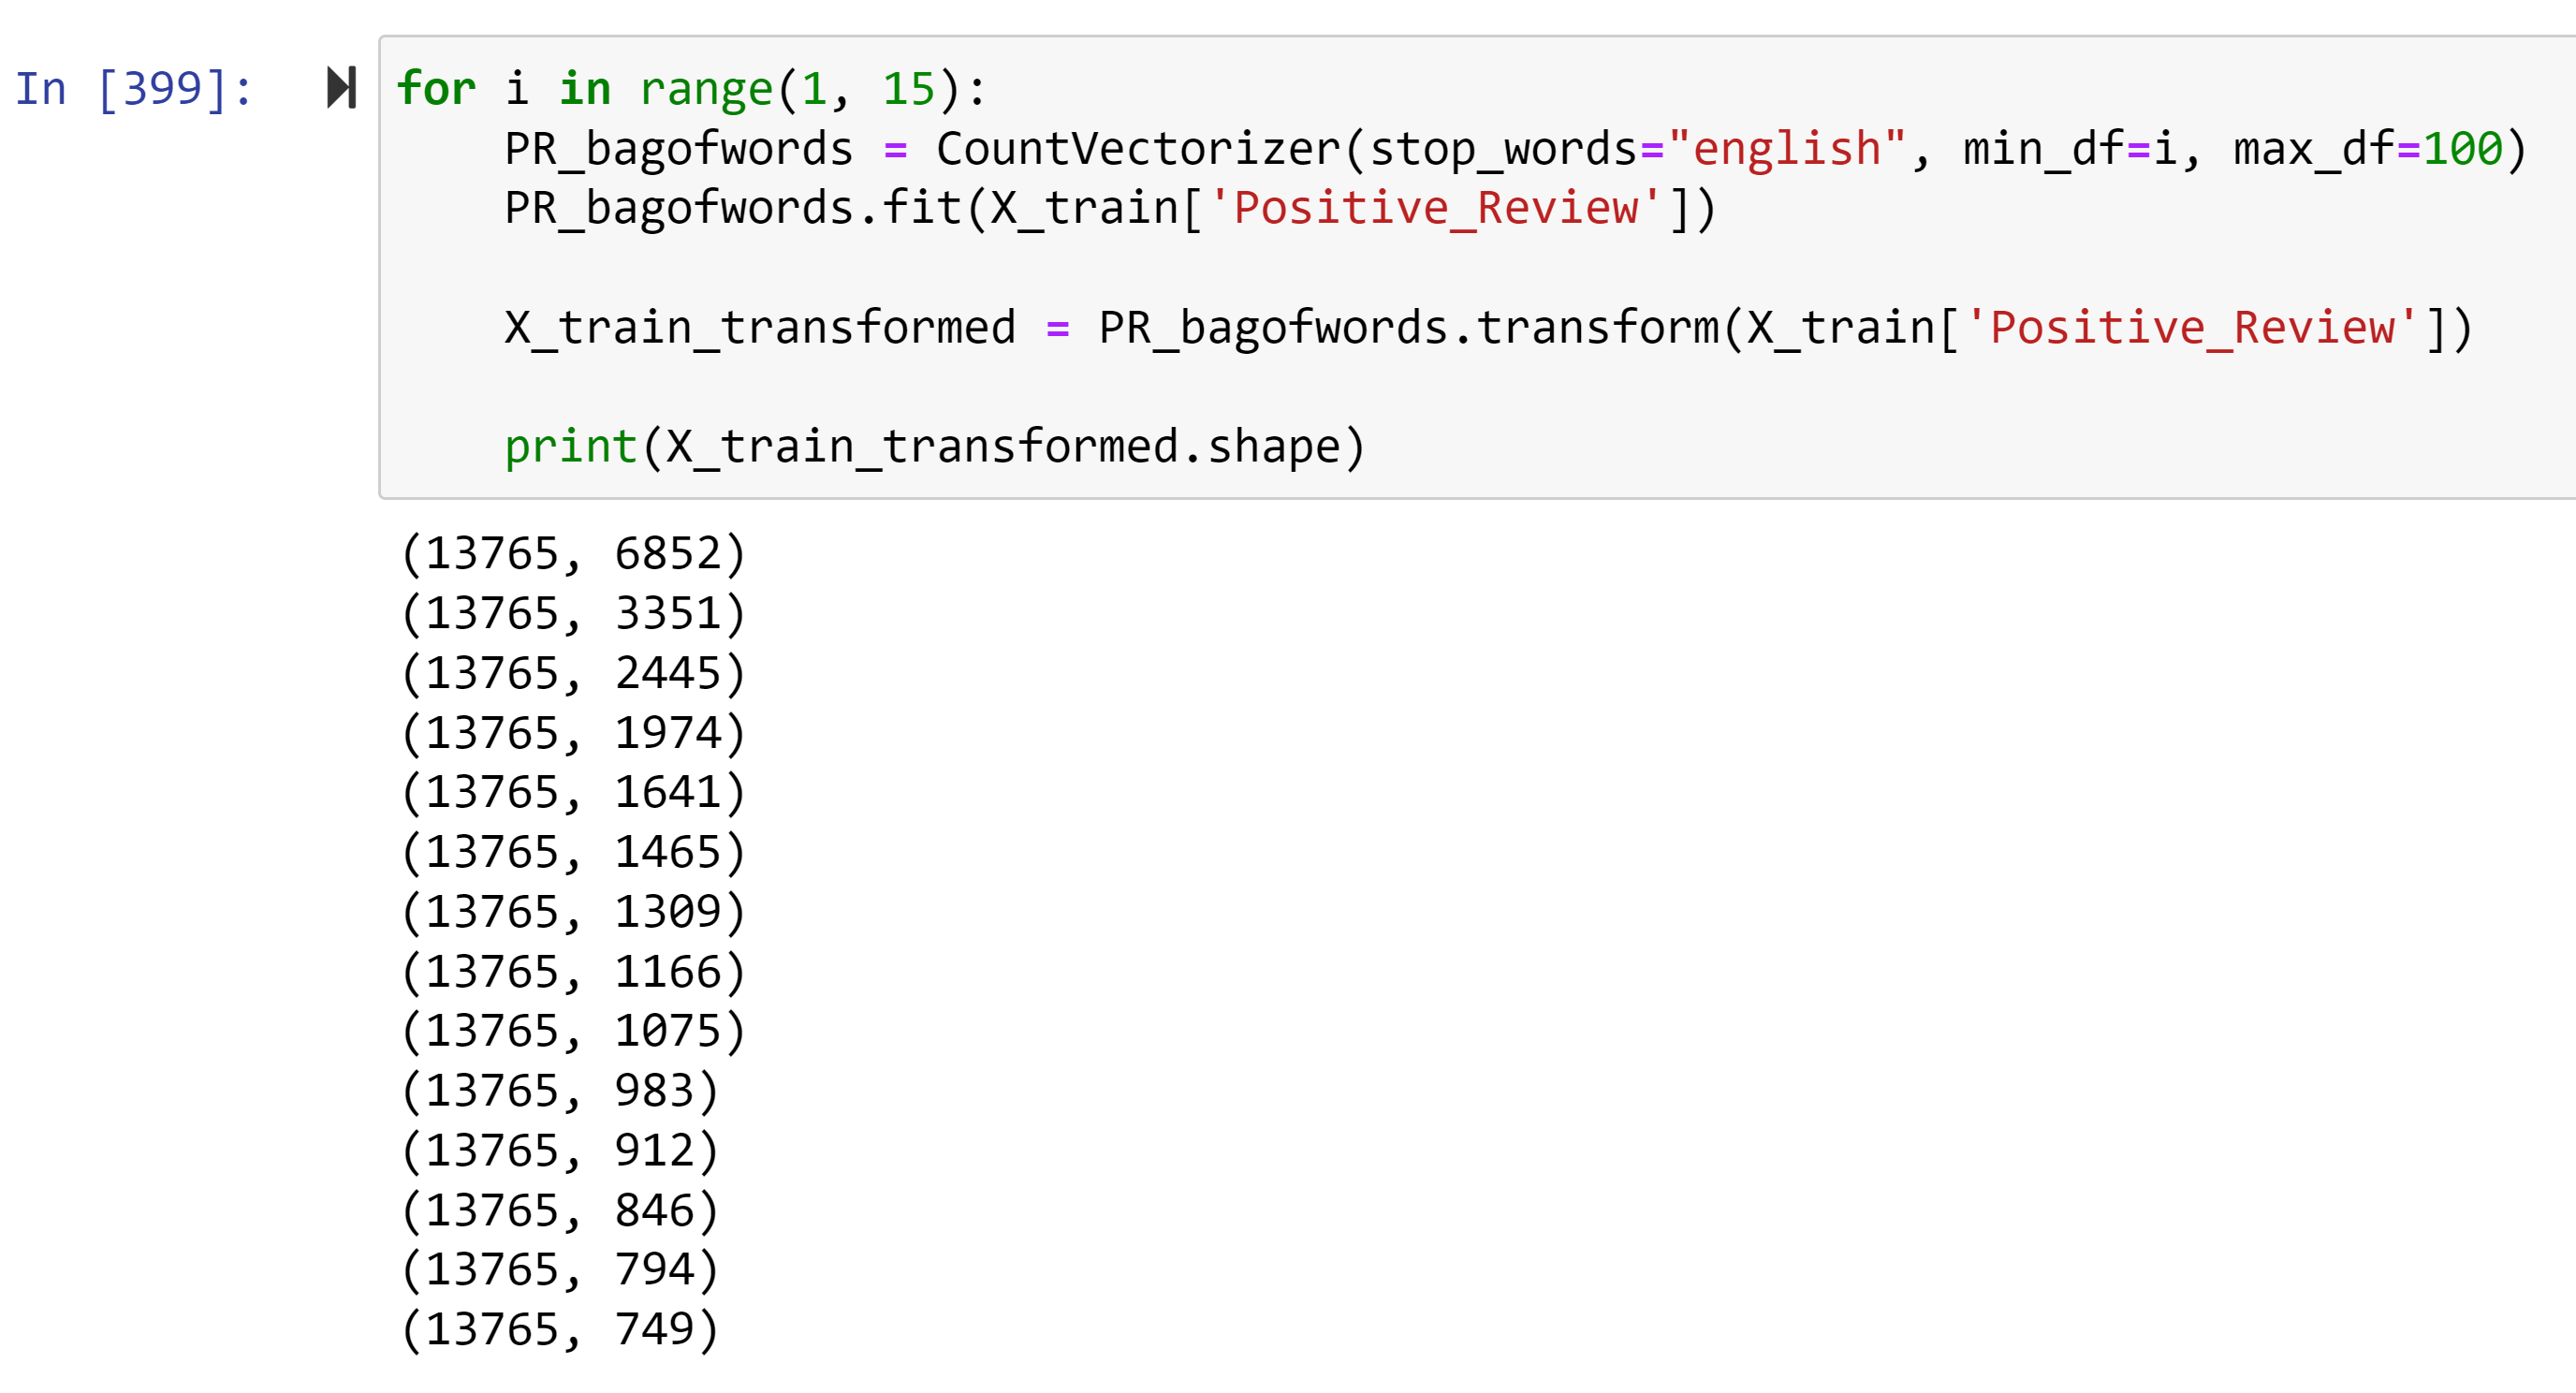

So in this example words are made into columns/dummies that appear in less than n number of reviews should be discarded, while all other words are kept. Words that appear less frequently may not be so important, which is why we ignore those infrequent words using the min_df parameter.

Citation - class jupyter notebooks